# Explainer Notebook

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pycountry_convert as pyc
%matplotlib inline  

In [13]:
df = pd.read_csv("master.csv")
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


# 1. Motivation

**What is your dataset?**

The dataset holds information on suicide rates for different generations, age groups, and gender of 101 different countries from 1985 to 2016.  Additionally,  there is annual information about the size of the population and the GPD, gross domestic product, for each country.

There are in total 12 features which are *country*, *year*, *sex*, *age*, *suicide_no*, *population*,  *suicides/100k pop*, *country-year*, *HDI for year*, *gdp\_for\_year\(\$\)*, *gdp\_per\_capita\(\$)* and *generation*. 

**Why did you choose this/these particular dataset(s)?**

This dataset is interesting because it holds various information about suicide which allows us to investigate the pattern between suicide rates and the countries they occur in or the age- and gender-groups that occur within the dataset. 

The dataset holds information that could shed light on interesting patterns that lie within the suicide occurrences over 30 years, and we are interested in seeing if we can find those patterns and articulate them to the end user. 

**What was your goal for the end user's experience?**

Our goal is to try and show the end user the patterns that emerge from this dataset, whether it be related to a country's status (GDP, Population, Continent) or within the population of the countries. 

# 2. Basic Stats

## **Write about your choices in data cleaning and preprocessing.**

The dataset was downloaded from [kaggle](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016) and is a popular database to analyze. 

We decided to drop columns such as **HDI for year** as it held a lot of NULL values. This can be seen below. We also decided to drop the column **country-year** because it did not serve any purpose. We added a column to represent each country's continent. This was done with an additional package called [pycountry_convert](https://pypi.org/project/pycountry-convert/). 

We also made the decision to limit our analysis to the years 1985 - 2015, as the year 2016 had insufficient data. 

Below we can see the reason behind dropping the column HDI for year. This attribute holds insufficient information.

In [14]:
df.isnull().sum()/len(df.index)*100

country                0.000000
year                   0.000000
sex                    0.000000
age                    0.000000
suicides_no            0.000000
population             0.000000
suicides/100k pop      0.000000
country-year           0.000000
HDI for year          69.935298
 gdp_for_year ($)      0.000000
gdp_per_capita ($)     0.000000
generation             0.000000
dtype: float64

As we can see below, the year 2016 holds insufficient information. *Describe why!*

In [15]:
df.groupby('year').count().tail(5)

,country,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
year,,,,,,,,,,,
2012,972,972,972,972,972,972,972,936,972,972,972
2013,960,960,960,960,960,960,960,924,960,960,960
2014,936,936,936,936,936,936,936,900,936,936,936
2015,744,744,744,744,744,744,744,0,744,744,744
2016,160,160,160,160,160,160,160,0,160,160,160


In [16]:
df.drop(['HDI for year','country-year'],axis=1,inplace=True)
df = df[df['year']!=2016]

## **Write a short section that discusses the dataset stats, containing key points/plots from your exploratory data analysis.**

In [17]:
df.sample(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
10474,Grenada,1993,male,15-24 years,0,9153,0.00,"309,812,185",3632,Generation X
3880,Belize,1993,male,35-54 years,0,12700,0.00,"559,858,250",3278,Boomers
13809,Kazakhstan,1996,male,55-74 years,731,836900,87.35,"21,035,357,833",1452,Silent
1199,Armenia,2011,male,5-14 years,0,189377,0.00,"10,142,111,334",3798,Generation Z
21695,Saint Vincent and Grenadines,1996,male,15-24 years,1,11360,8.80,"331,489,704",3450,Generation X


In [24]:
df.describe()

,year,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
count,27660.000000,27660.000000,2.766000e+04,27660.000000,27660.000000
mean,2001.173102,243.413485,1.850689e+06,12.812597,16815.568330
std,8.418754,904.490185,3.920658e+06,18.972063,18861.585497
min,1985.000000,0.000000,2.780000e+02,0.000000,251.000000
25%,1994.000000,3.000000,9.753525e+04,0.910000,3436.000000
50%,2002.000000,25.000000,4.307250e+05,5.980000,9283.000000
75%,2008.000000,132.000000,1.491041e+06,16.602500,24796.000000
max,2015.000000,22338.000000,4.380521e+07,224.970000,126352.000000


As we can see below, the year 2016 holds insufficient information.

Text(0, 0.5, 'Suicides')

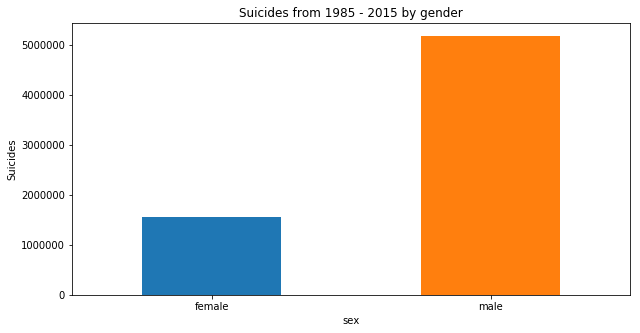

In [303]:
df_sex = df.groupby(['sex']).suicides_no.sum().reset_index()
ax = df_sex.plot(kind='bar',x='sex',y='suicides_no',figsize=(10,5),legend=False, title="Suicides from 1985 - 2015 by gender", rot=0)
ax.set_ylabel("Suicides")

This is something that was to be expected, i.e. we expected that there be more occurances of suicides by men than women within this database, but this is still surprising. There are more than **three men for each woman** that commit suicide. 

Let's see if there has been any interesting development in suicides by gender over the years

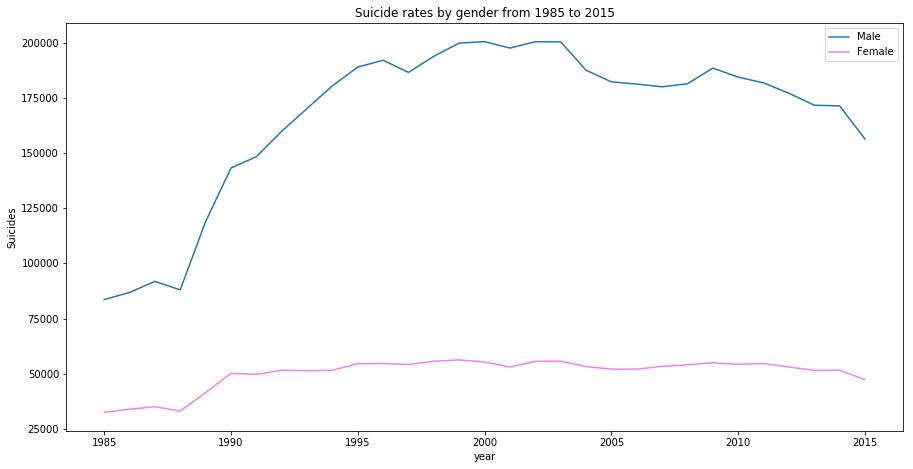

In [381]:
df_gender_years = df.groupby(['sex','year']).suicides_no.sum().reset_index()
df_gender_years_m = df_gender_years[df_gender_years['sex']=='male']
df_gender_years_f = df_gender_years[df_gender_years['sex']=='female']

ax = df_gender_years_m.plot(x="year",y="suicides_no", title="Suicide rates by gender from 1985 to 2015", figsize=(15,7.5))
df_gender_years_f.plot(ax = ax, x="year",y="suicides_no",c='violet')
ax.set_ylabel("Suicides")
ax.legend(["Male", "Female"]);

If we plot them side by side, we can see that they both take a dip around the year 2002, which could be quite interesting. 

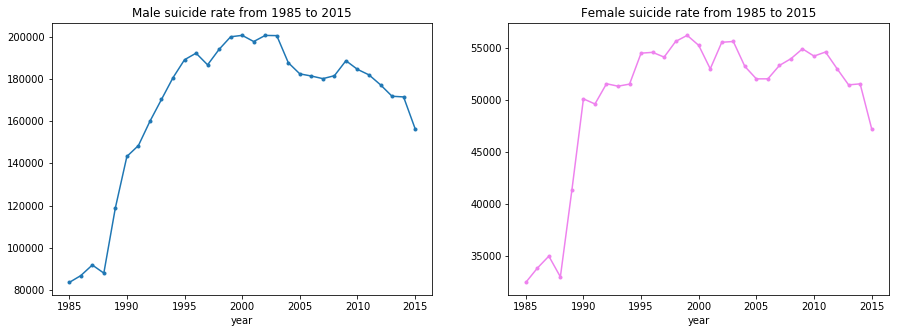

In [383]:
ax = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1,2,2)
df_gender_years_m.plot(ax = ax,x="year",y="suicides_no", title="Male suicide rate from 1985 to 2015", legend = False,figsize=(15,5),style='.-')
df_gender_years_f.plot(ax=ax2,x="year",y="suicides_no", title="Female suicide rate from 1985 to 2015", legend = False, c='violet',style='.-')

The two genders seem to have a similar development over the years, it's just that the males are on a larger scale. 

Lets look at suicide rates by countries next.

Text(0, 0.5, 'Suicides')

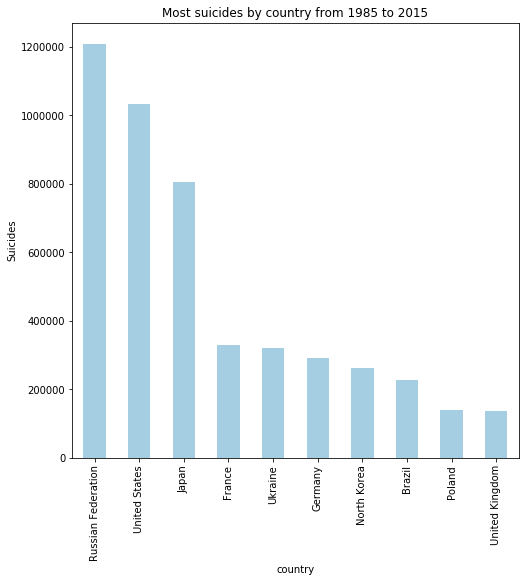

In [306]:
df_top_10 = df.groupby(['country']).suicides_no.sum().reset_index().sort_values(by='suicides_no', ascending=False).head(10)
ax = df_top_10.plot(figsize=(8,8),kind="bar", x="country", y="suicides_no", title="Most suicides by country from 1985 to 2015", legend = False, colormap='Paired')
ax.set_ylabel("Suicides")

It makes sense that Russia, the US and Japan have the most suicides because they have some of the largest population in the world. If **China** were represented in this database, we would expect them to be within this barchart. A more informative chart is the barchart where we show the suicides per 100k.

Text(0, 0.5, 'Suicides per 100k of population')

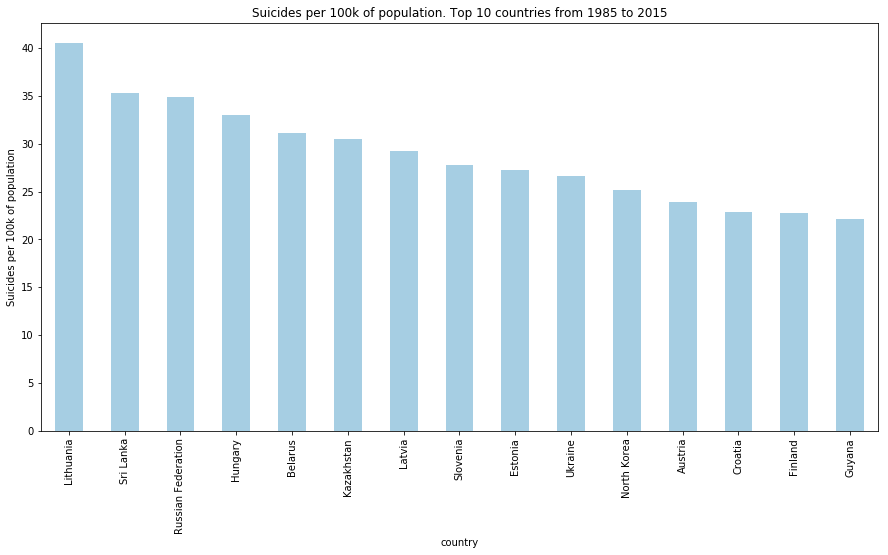

In [310]:
df_top_10_100k = df.groupby(['country'])['suicides/100k pop'].mean().reset_index().sort_values(by='suicides/100k pop',ascending=False).head(15)
ax = df_top_10_100k.plot(kind="bar",x="country",y="suicides/100k pop",figsize=(15,7.5), legend=False, colormap='Paired',title="Suicides per 100k of population. Top 10 countries from 1985 to 2015")
ax.set_ylabel("Suicides per 100k of population")

Here we see a more informative barchart. We still see that *Russia* is in the top 5, which is quite interesting. This means suicides within Russia are quite common. There are also a lot of poor countries represented within this list. Let's look at the division between continents.

Text(0, 0.5, 'Suicides')

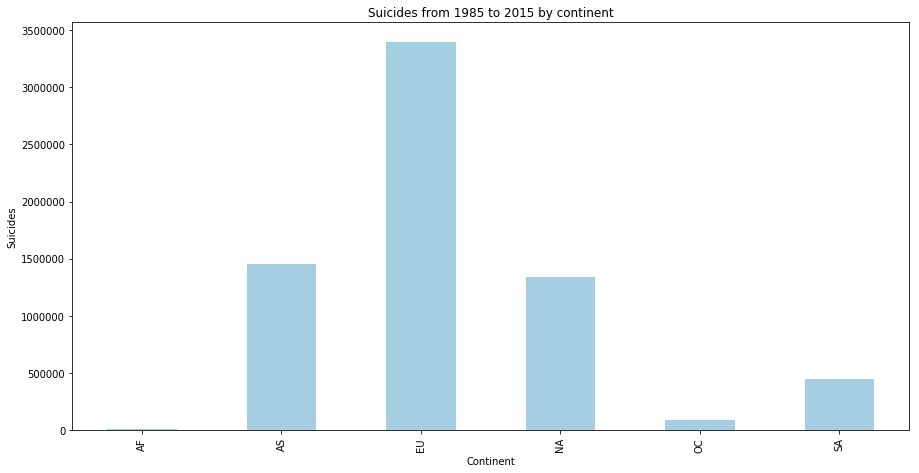

In [319]:
#Lets put the continents in the dataset.
def change_country_name(country):
    if(country == 'Republic of Korea'):
        return 'North Korea'
    elif(country == 'Saint Vincent and Grenadines'):
        return 'Saint Vincent and the Grenadines'
    else:
        return country

def get_continent(country):
    alpha2 = pyc.country_name_to_country_alpha2(country)
    return pyc.country_alpha2_to_continent_code(alpha2)

df['country'] = df['country'].map(change_country_name)
df['Continent'] = df['country'].map(get_continent)

df_continent = df.groupby(['Continent']).suicides_no.sum().reset_index()
ax = df_continent.plot(kind="bar", x="Continent",y="suicides_no",colormap="Paired", title="Suicides from 1985 to 2015 by continent", figsize=(15,7.5),legend=False)
ax.set_ylabel("Suicides")

We believe the data from Africa is vastly under-represented. We can see that Europe dominates this chart, but that is probably because it is the most populated continent **within the database**. Because China is missing from Asia, we are not getting a correct representation from that continent. Also, there seems to be a lot of missing data from a lot of countries from Africa. This made us decide to focus on Europe, as the data there seems to be most trustworthy. 

We can look at the development of suicides/100k within europe trough the years. 

Text(0.5, 0, 'Year')

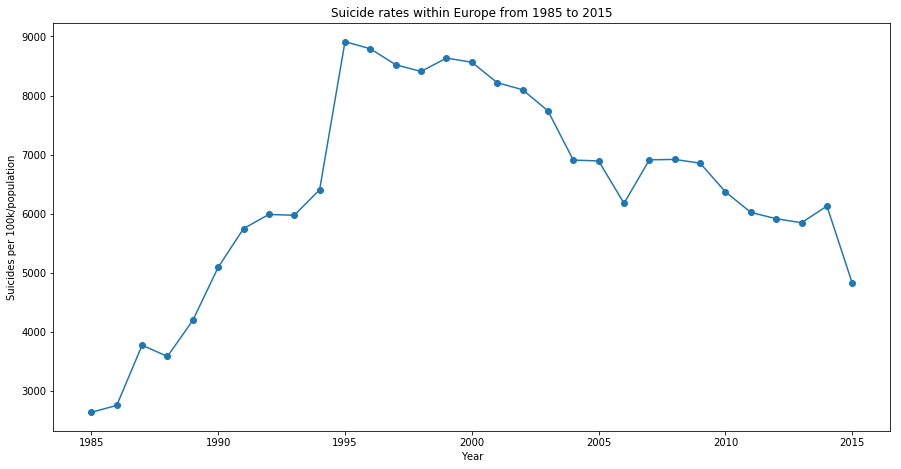

In [430]:
df_europe = df.groupby(['year','Continent'])['suicides/100k pop'].sum().reset_index()
df_europe = df_europe[df_europe['Continent']=='EU']
ax = df_europe.plot(x='year',y='suicides/100k pop',figsize=(15,7.5),style='o-',legend=False, title="Suicide rates within Europe from 1985 to 2015")
ax.set_ylabel("Suicides per 100k/population")
ax.set_xlabel("Year")

**Overall, suicides seem to be going down, and they peak at around 1995. It is quite interesting to look at the slope from 1985 to 1995. We can deduct that there is some insufficient data around 1985, but the slope goes steadily upward until there is a decrease after 1995.**

What about age groups and generations? 

Text(0.5, 0, 'Age group')

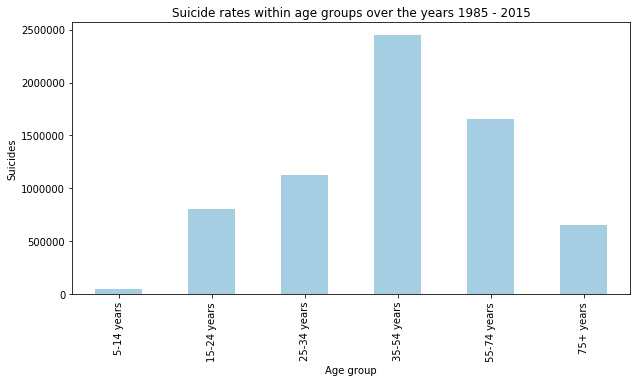

In [419]:
df_age = df.groupby('age').suicides_no.sum().reset_index()

target_row = 3
# Move target row to first element of list.
idx = [target_row] + [i for i in range(len(df_age)) if i != target_row]

df_age = df_age.iloc[idx]
ax = df_age.plot(kind="bar",x='age',y='suicides_no',colormap='Paired',legend=False, figsize=(10,5),title="Suicide rates within age groups over the years 1985 - 2015")
ax.set_ylabel('Suicides')
ax.set_xlabel('Age group')


Suicide rates seem to peak when people are between 35-54 years old, but this is over the whole world. We should expect this graph to look like this because the two largest bars represent the two largest age groups. We can also expect that within some countries, life expectancy is not much more than 70 years. Lets take a look at this distribution within Europe.

Text(0.5, 0, 'Age group')

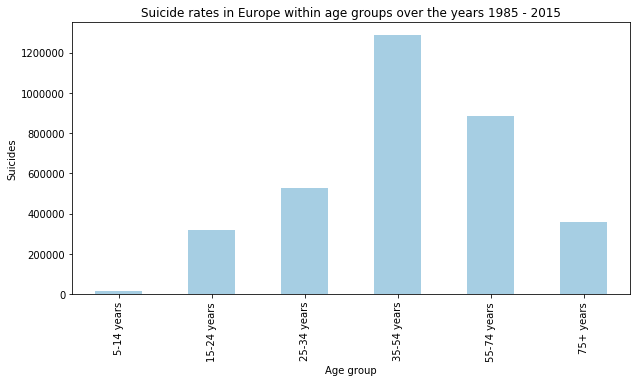

In [420]:
df_europe_age = df.groupby(['Continent','age']).suicides_no.sum().reset_index()
df_europe_age = df_europe_age[df_europe_age['Continent']=='EU']
df_europe_age.reset_index(inplace=True)
df_europe_age.drop('index',axis=1)
target_row = 3
# Move target row to first element of list.
idx = [target_row] + [i for i in range(len(df_europe_age)) if i != target_row]

df_europe_age = df_europe_age.iloc[idx]

ax = df_europe_age.plot(kind="bar",x='age',y='suicides_no',colormap='Paired',legend=False, figsize=(10,5),title="Suicide rates in Europe within age groups over the years 1985 - 2015")
ax.set_ylabel('Suicides')
ax.set_xlabel('Age group')


It is an identical distribution.

Let's look at it from a different perspective, i.e. lets look at the standardized column of "suicides/100k"

Text(0.5, 0, 'Age group')

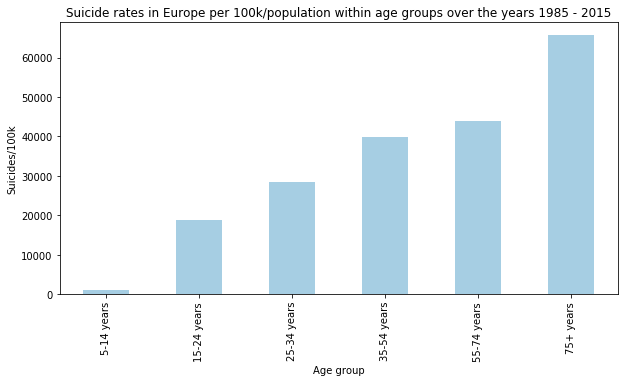

In [426]:
df_europe_age = df.groupby(['Continent','age'])['suicides/100k pop'].sum().reset_index()
df_europe_age = df_europe_age[df_europe_age['Continent']=='EU']
df_europe_age.reset_index(inplace=True)
df_europe_age.drop('index',axis=1)
target_row = 3
# Move target row to first element of list.
idx = [target_row] + [i for i in range(len(df_europe_age)) if i != target_row]

df_europe_age = df_europe_age.iloc[idx]

ax = df_europe_age.plot(kind="bar",x='age',y='suicides/100k pop',colormap='Paired',legend=False, figsize=(10,5),title="Suicide rates in Europe per 100k/population within age groups over the years 1985 - 2015")
ax.set_ylabel('Suicides/100k')
ax.set_xlabel('Age group')


This tells us something else, that in fact suicide rates increase by age. This is rather surprising. Is it like this within all the continents, i.e. the world? 

Text(0.5, 0, 'Age group')

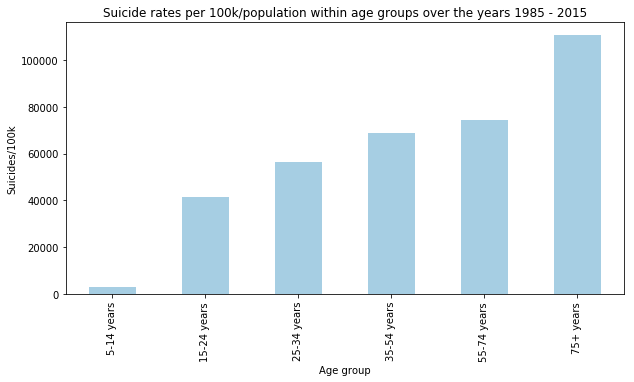

In [455]:
df_age = df.groupby('age')['suicides/100k pop'].sum().reset_index()
df_age.reset_index(inplace=True)
df_age.drop('index',axis=1)
target_row = 3
# Move target row to first element of list.
idx = [target_row] + [i for i in range(len(df_age)) if i != target_row]

df_age = df_age.iloc[idx]

ax = df_age.plot(kind="bar",x='age',y='suicides/100k pop',colormap='Paired',legend=False, figsize=(10,5),title="Suicide rates per 100k/population within age groups over the years 1985 - 2015")
ax.set_ylabel('Suicides/100k')
ax.set_xlabel('Age group')

It is like this over the whole dataset. **Suicide rates and age seem to corrilate.**

Lets look at how it has developed over the years, within Europe this time. 

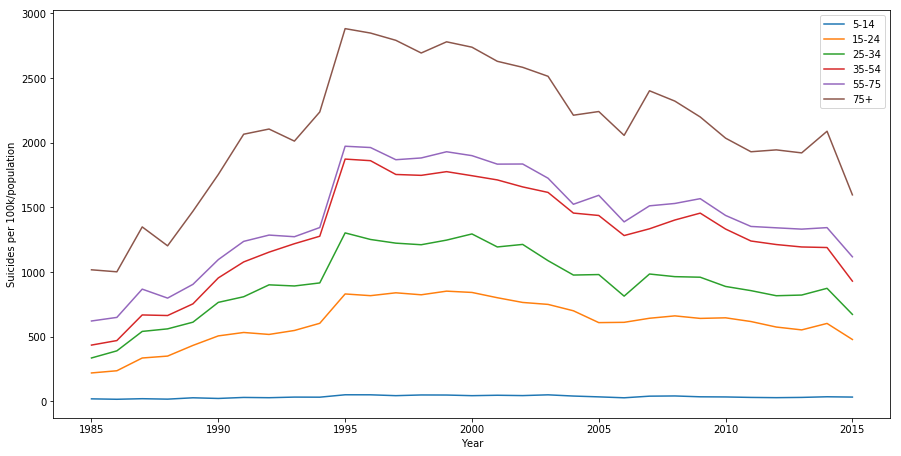

In [459]:
df_europe = df[df['Continent'] == 'EU']
df_europe_age_year = df_europe.groupby(['age','year'])['suicides/100k pop'].sum().reset_index()
df_europe_age_year0 = df_europe_age_year[df_europe_age_year['age'] == '5-14 years']
df_europe_age_year1 = df_europe_age_year[df_europe_age_year['age'] == '15-24 years']
df_europe_age_year2 = df_europe_age_year[df_europe_age_year['age'] == '25-34 years']
df_europe_age_year3 = df_europe_age_year[df_europe_age_year['age'] == '35-54 years']
df_europe_age_year4 = df_europe_age_year[df_europe_age_year['age'] == '55-74 years']
df_europe_age_year5 = df_europe_age_year[df_europe_age_year['age'] == '75+ years']

df_europe_age_year1.head()
ax = df_europe_age_year0.plot(x="year",y="suicides/100k pop", figsize = (15,7.5))
df_europe_age_year1.plot(ax = ax, x="year", y="suicides/100k pop")
df_europe_age_year2.plot(ax = ax, x="year", y="suicides/100k pop")
df_europe_age_year3.plot(ax = ax, x="year", y="suicides/100k pop")
df_europe_age_year4.plot(ax = ax, x="year", y="suicides/100k pop")
df_europe_age_year5.plot(ax = ax, x="year", y="suicides/100k pop")

ax.set_ylabel("Suicides per 100k/population")
ax.set_xlabel("Year")
ax.legend(["5-14", "15-24","25-34","35-54","55-75","75+"]);

The age groups develop similarly, and all seem to peak at around 1995 and slope downword from then on. 

In [301]:
df_scandinavia = df[((df['country']=='Iceland') | (df['country']=='Denmark') | (df['country']=='Norway') | (df['country']=='Finland') | (df['country']=='Sweden'))]

# 3. Data Analysis

## Describe your data analysis and explain what you've learned about the dataset.


## If relevant, talk about your machine-learning.

It is quite hard to deploy machine learning algorithms or tools on this dataset, as most of its information is held within a time-frame.

In [25]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


In [ ]:
countryYear = df.groupby('country','year') 

# 4. Genre


Which genre of data story did you use?


Which tools did you use from each of the 3 categories of Visual Narrative (Figure 7 in Segal and Heer). Why?


Which tools did you use from each of the 3 categories of Narrative Structure (Figure 7 in Segal and Heer). Why?

# 5. Vizualization

Explain the visualizations you've chosen.


Why are they right for the story you want to tell?

# 6. Discussion

Think critically about your creation


What went well?


What is still missing? What could be improved?, Why?

# 7. Contributions

You should write (just briefly) which group member was the main responsible for which elements of the assignment. (I want you guys to understand every part of the assignment, but usually there is someone who took lead role on certain portions of the work. That's what you should explain).

It is not OK simply to write "All group members contributed equally".